In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

Install kaggle to download the dataset from kaggle

In [0]:
 ! pip install -q kaggle

Go to "My account" in kaggle and click on "create new API token" , this downloads kaggle.json file . Upload that file 

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niteeshaballa","key":"f3f6d236bc449b78092d623eba74ae90"}'}

Make a directory named kaggle and move this json file in to the directory

In [15]:
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change permissions to download

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

Download the planets dataset using the below command as the dataset from the original link is moved

In [17]:
! kaggle datasets download nikitarom/planets-dataset

 99% 1.48G/1.50G [00:24<00:00, 56.2MB/s]
100% 1.50G/1.50G [00:24<00:00, 66.0MB/s]


In [0]:
! unzip -q -n /content/planets-dataset.zip

In [19]:
path =Path('/content/planet/planet')
#path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content/planet/planet')

In [20]:
df = pd.read_csv(path/'train_classes.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_classes.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

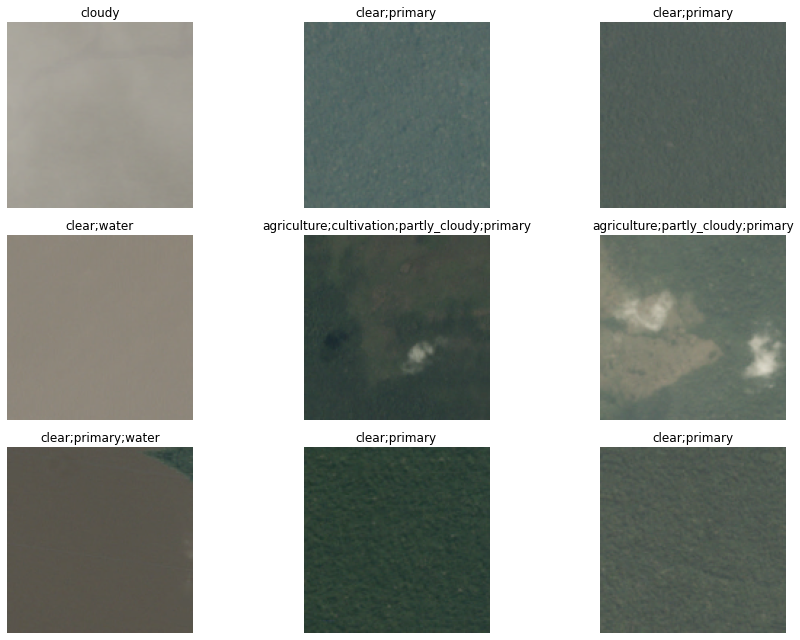

In [24]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch = models.resnet50

In [26]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


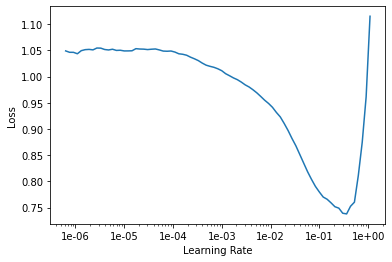

In [28]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [30]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.137229,0.121944,0.950209,0.894663,02:45
1,0.115804,0.099053,0.949162,0.912901,02:50
2,0.102161,0.094238,0.951887,0.917194,02:52
3,0.095521,0.087556,0.955375,0.925372,02:50
4,0.092405,0.086632,0.955179,0.925457,02:49


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


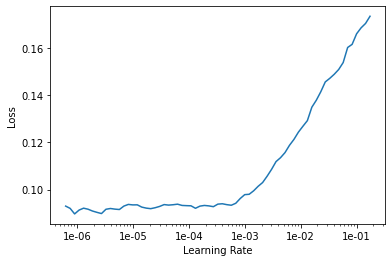

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.100343,0.092271,0.954540,0.920220,02:54
1,0.095867,0.088254,0.951764,0.923935,02:53
2,0.091022,0.087090,0.958689,0.925829,02:53
3,0.083792,0.083249,0.958733,0.929301,02:51
4,0.081539,0.082392,0.958580,0.929867,02:47


In [0]:
learn.save('stage-2-rn50')

In [0]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


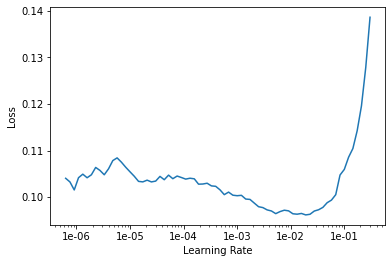

In [38]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-2/2

In [40]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.086013,0.085300,0.959743,0.925632,05:00
1,0.087748,0.083920,0.960455,0.927199,05:00
2,0.083256,0.083162,0.960419,0.928410,05:00
3,0.079701,0.082096,0.961094,0.929300,04:58
4,0.076853,0.081180,0.959365,0.931156,04:57


In [0]:
learn.save('stage-1-256-rn50')

In [0]:
learn.unfreeze()

In [43]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.082984,0.083308,0.955819,0.928861,05:13
1,0.085041,0.084188,0.958464,0.927965,05:27
2,0.082127,0.081840,0.958893,0.930020,05:37
3,0.078580,0.080796,0.958856,0.930738,05:55
4,0.073870,0.080955,0.959561,0.930777,05:54


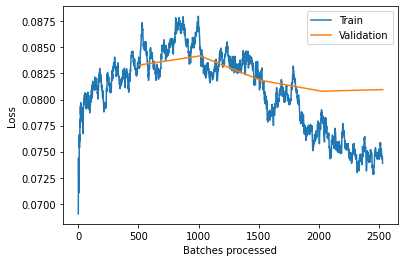

In [44]:
learn.recorder.plot_losses()